In [1]:
import spacy
import matplotlib.pyplot as plt
import json
import requests
import pandas as pd
import os
import numpy as np
import nltk
import matplotlib.pyplot as plt
import base64

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from spacy.matcher import PhraseMatcher
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS
from io import BytesIO

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")
nltk.download('stopwords')

def load_jsons_from_directory(directory):
    json_files = [f for f in os.listdir(directory) if f.endswith('.json')]
    json_data = {}
    for json_file in json_files:
        with open(os.path.join(directory, json_file), 'r') as file:
            data = json.load(file)
            # Assume the file name minus '.json' is the incomplete DOI
            incomplete_doi = os.path.splitext(json_file)[0]
            json_data[incomplete_doi] = data
    return json_data

def load_json(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)


def augment_questions_with_data(questions_data, all_data):
    for question_entry in questions_data:
        doi = question_entry['doi']
        if doi in all_data:
            # Assuming you want to add the entire content of the related JSON
            question_entry['related_data'] = all_data[doi]
            question_entry['doi'] = all_data[doi]["DOI"][len("https://doi.org/"):]
    return questions_data

def save_json(data, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        json.dump(data, file, ensure_ascii=False, indent=4)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/potatosalad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
with open("../data/all_questions_gpt_4.json", 'r') as file:
    data = json.load(file)

In [3]:
# Load all JSON data from the 'all_output' directory
all_data = load_jsons_from_directory('../data/all_output')
print(len(all_data))

# Load the main questions file
questions_data = load_json('../data/all_questions_gpt_4.json')

# Augment the data
all_data = augment_questions_with_data(questions_data, all_data)

# Save the augmented questions back to a new JSON file
save_json(all_data, '../data/chem_mqa_dataset.json')

459


In [4]:
def fetch_year(doi):
    url = f"https://api.crossref.org/works/{doi}"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raises HTTPError for bad responses
        json_data = response.json()
        year = json_data.get('message', {}).get('created', {}).get('date-parts', [[None]])[0][0]
        return year
    except requests.exceptions.RequestException as e:
        # print(f"Request error for DOI: {doi}, Error: {e}")
        return np.nan
    except json.JSONDecodeError:
        # print(f"JSON decoding failed for DOI: {doi}")
        return np.nan

file_path = '../data/chem_mqa_dataset.json'
questions_data = load_json(file_path)

for question_entry in questions_data:
    if 'doi' in question_entry:
        doi = question_entry['doi']
        year = fetch_year(doi)
        print(year)
        year = 'NaN' if pd.isna(year) else str(year)
        print("="*25)
        question_entry['year'] = year

# Save the augmented data
save_json(questions_data, file_path)

2024
2024
2024
2024
2024
2024
2024
2024
2024
2024
2024
2024
2024
2024
2024
2024
2024
2024
2024
2024
2020
2020
2020
2020
2020
2020
2020
2020
2020
2020
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2022
2022
2022
2022
2022
2022
2022
2022
2022
2022
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2023
2023
2023
2023
2023
2023
2023
2023
2023
2023
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2021
2021
2021
2021
2021
2021
2021
2021
2021
2021
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2023
2023
2023
2023
2023
2023
2023
2023
2023
2023
2024
2024
2024
2024
2024
2024
2024
2024
2024
2024
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2023
2023
2023
2023
2023
2023
2023
2023
2023
2023
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [2]:
data = load_json('../data/chem_mqa_dataset.json')
data[0]

{'Question_1': {'Context': 'Nanoparticles can be engineered to exhibit certain behaviors within biological systems, which can be influenced by their size, shape, surface charge, and chemical modifications.',
  'Question': 'What is the effect of nanoparticle size on their uptake by phagocytic cells?',
  'A': 'Size has no effect on uptake by phagocytic cells',
  'B': 'Larger nanoparticles are more readily engulfed by phagocytic cells',
  'C': 'Smaller nanoparticles are more readily engulfed by phagocytic cells',
  'D': 'Only nanoparticles of medium size are engulfed by phagocytic cells',
  'Answer': 'B',
  'Source': 'Our results of internalisation experiments involving three submicron-sized nanoparticles and RAW264.7 murine macrophage cells suggested that the uptake of nanoparticles by phagocytic cells is size-dependent. Recent studies have reported similar findings of internalisation experiments involving macrophage cell lines and PLGA nanoparticles, emphasising that larger nanoparticle

In [3]:
# Load the English NLP model
# nlp = spacy.load("en_core_web_sm")

def filter(data, topic, start_year, end_year):
    # matcher = PhraseMatcher(nlp.vocab)
    # pattern = nlp(topic)
    # matcher.add("TOPIC", [pattern])
    filtered_questions = []

    for item in data:
        # Retrieve the year from the item or assign None if not available
        item_year = item.get('year', None)

        # Check if the year of the datapoint is within the specified interval
        if item_year and start_year <= item_year <= end_year:
            text_to_search = ""
            if "Question_1" in item:  # Adjust according to your data structure
                question = item["Question_1"]
                text_to_search += f"{question['Context']} {question['Question']} {question.get('Source', '')}"

            if "related_data" in item:
                related_data = item["related_data"]
                text_to_search += f" {related_data.get('Title', '')} {related_data.get('Abstract', '')} {' '.join(related_data.get('Keywords', []))}"
                text_to_search += f" {related_data.get('Methods', '')} {related_data.get('Results', '')} {related_data.get('Experiment details', '')}"

            # doc = nlp(text_to_search)
            # matches = matcher(doc)
            if any(word.lower() in text_to_search.lower() for word in topic):
                filtered_questions.append(item)

    return filtered_questions

topic = [
    "catalysis", "biocatalytic", "biocatalysis", "catalyst", "enzyme", "catalytic", "catalyze", "catalyzed", "catalyzing", "catalytic activity", "chemical reaction", "reaction rate", "reaction mechanism", "heterogeneous catalysis", "homogeneous catalysis", "metal catalyst", "organocatalysis", "enzyme catalysis", "transition metal catalyst", "acid catalysis", "activation energy", "kinetics", "substrate", "product", "selectivity", "activity", "chemical transformation", "enzyme kinetics", "transition state", "reaction intermediate", "enzymatic", "photochemical", "catalytic cycle", "chemical bond activation", "hydrogenation", "oxidation", "reduction", "dehydrogenation", "hydrogenolysis", "isomerization", "polymerization", "decarboxylation", "hydrolysis", "esterification", "acylation", "dehalogenation", "hydrogen transfer", "carbonylation", "metathesis", "carbon-carbon bond formation", "hydrogen bond activation", "regioselectivity", "stereoselectivity", "enantioselectivity", "asymmetric catalysis", "enantioenrichment", "enantioenriched", "enantioselective", "enantioselectivity", "enantiospecific", "enantiospecificity", "enantioseparation", "enantioenrichment", "enantioselective synthesis", "enantioselective reaction", "enantioselective catalyst", "enantioselective transformation", "enantioselective addition", "enantioselective hydrolysis", "enantioselective reduction", "enantioselective oxidation", "enantioselective desymmetrization", "enantioselective esterification", "enantioselective amidation", "enantioselective alkylation", "enantioselective ring opening", "enantioselective ring closing", "enantioselective cyclization", "enantioselective allylation", "enantioselective allylic substitution"
]

start_year = 2024
end_year = 2024

filtered = filter(data, topic, start_year, end_year)

In [4]:
print(len(filtered))

350


In [5]:
print(filtered[0])

{'Question_11': {'Context': 'Alkaline hydrogen peroxide (AHP) treatment is used to enhance the digestibility of lignocellulosic biomass by removing lignin and other components that limit enzyme access to cellulose.', 'Question': 'What is the primary purpose of using alkaline hydrogen peroxide (AHP) treatment on lignocellulosic biomass?', 'A': 'To increase its weight', 'B': 'To enhance its digestibility', 'C': 'To change its color', 'D': 'To reduce its energy content', 'Answer': 'B', 'Source': 'The optimization of AHP treatment is a key step to minimize the cost of treatment without increasing both polyphenols content and lipid oxidation. In this regard, AHP treatment of EOP was investigated using the response surface methodology RSM in which sodium hydroxide (NaOH) varied between 1% (w/v) to 6% (w/v) and hydrogen peroxide (H2O2) varied between 1% (w/v) and 4% (w/v).'}, 'doi': '10.1186/s40538-024-00533-9', 'related_data': {'Title': 'Effect of Alkaline Hydrogen Peroxide Pretreatment on I

In [10]:
print(filtered[:1])

[{'Question_11': {'Context': 'Alkaline hydrogen peroxide (AHP) treatment is used to enhance the digestibility of lignocellulosic biomass by removing lignin and other components that limit enzyme access to cellulose.', 'Question': 'What is the primary purpose of using alkaline hydrogen peroxide (AHP) treatment on lignocellulosic biomass?', 'A': 'To increase its weight', 'B': 'To enhance its digestibility', 'C': 'To change its color', 'D': 'To reduce its energy content', 'Answer': 'B', 'Source': 'The optimization of AHP treatment is a key step to minimize the cost of treatment without increasing both polyphenols content and lipid oxidation. In this regard, AHP treatment of EOP was investigated using the response surface methodology RSM in which sodium hydroxide (NaOH) varied between 1% (w/v) to 6% (w/v) and hydrogen peroxide (H2O2) varied between 1% (w/v) and 4% (w/v).'}, 'doi': '10.1186/s40538-024-00533-9', 'related_data': {'Title': 'Effect of Alkaline Hydrogen Peroxide Pretreatment on 

<?xml version="1.0" encoding="utf-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<svg xmlns:xlink="http://www.w3.org/1999/xlink" width="720pt" height="360pt" viewBox="0 0 720 360" xmlns="http://www.w3.org/2000/svg" version="1.1">
 <metadata>
  <rdf:RDF xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:cc="http://creativecommons.org/ns#" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
   <cc:Work>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:date>2024-05-06T16:48:13.991414</dc:date>
    <dc:format>image/svg+xml</dc:format>
    <dc:creator>
     <cc:Agent>
      <dc:title>Matplotlib v3.7.2, https://matplotlib.org/</dc:title>
     </cc:Agent>
    </dc:creator>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <style type="text/css">*{stroke-linejoin: round; stroke-linecap: butt}</style>
 </defs>
 <g id="figure_1">
  <g id="patch_1">
   <path d="M 0 360 
L 720 360 
L 720 0 
L

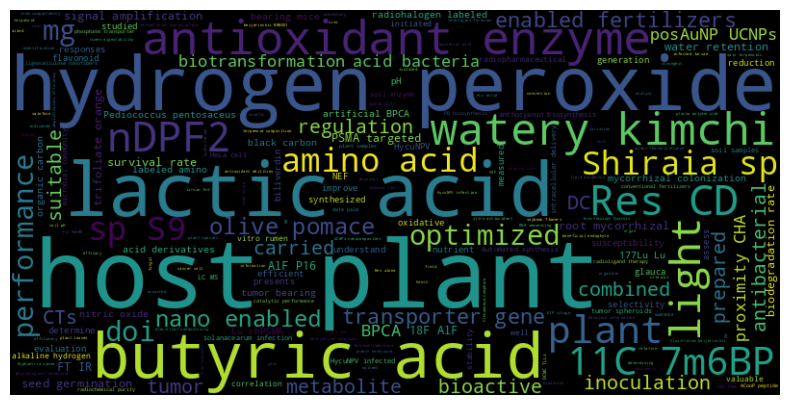

In [6]:
def collect_text(data):
    text_data = []
    for item in data:
        text = ""
        if "Question_1" in item:
            question_data = item["Question_1"]
            context = question_data.get('Context', '')
            question = question_data.get('Question', '')
            answer = question_data.get('Answer', '')
            source = question_data.get('Source', '')
            text += f"{context} {question} {answer} {source} "
        
        if "related_data" in item:
            related_data = item["related_data"]
            keywords = ' '.join(related_data.get('Keywords', []))
            abstract = related_data.get('Abstract', '')
            methods = related_data.get('Methods', '')
            results = related_data.get('Results', '')
            exp_details = related_data.get('Experiment details', '')
            text += f"{keywords} {abstract} {methods} {results} {exp_details} "
        
        text_data.append(text.strip())  # Strip to remove any extra spaces from the start and end of the text
    return text_data

# Generate the word cloud
def generate_word_cloud(documents):
    # ----------- Not using right now -----------------------------------------
    # Initialize TF-IDF Vectorizer to identify common words
    vectorizer = TfidfVectorizer(stop_words='english', max_df=0.3)
    _ = vectorizer.fit_transform(documents)
    
    # Retrieve the words that were ignored because they're too common
    common_terms = set(vectorizer.stop_words_)
    # ----------- Not using right now -----------------------------------------

    # NLTK Stopwords
    nltk_stopwords = set(stopwords.words('english'))
    
    manual_remove = [
        "certain", "involved", "response", "surface", "particular", "study", "show", "results", "found", "result", "used", "using", "studies", "provide", "provide", "discuss", "investigate", "investigation", "provide", "demonstrate", "evaluate", "evaluate", "propose", "novel", "investigated", "found", "proposed", "discussed", "demonstrated", "reported", "shown", "research", "investigate", "investigating", "evaluated", "evaluate", "proposed", "proposes", "novel", "investigated", "demonstrated", "reported", "showed", "demonstrated", "investigate", "investigating", "proposed", "proposes", "novel", "investigated", "reported", "shown", "discuss", "discusses", "provide", "provides", "demonstrate", "demonstrates", "evaluate", "evaluates", "investigate", "investigates", "propose", "proposes", "novel", "novels", "investigated", "investigations", "demonstrated", "demonstrates", "reported", "reports", "shown", "shows", "discussing", "proposing", "investigated", "demonstrated", "reported", "showed", "discussed", "proposed", "novel", "investigated", "demonstrated", "reported", "shown", "discuss", "investigate", "evaluate", "propose", "novel", "research", "role", "including", "known", "context", "content", "use", "important", "different", "production", "effect", "affect", "method", "application", "compound", "structure", "activity", "form", "also", "role", "including", "known", "context", "content", "use", "important", "different", "production", "effect", "affect", "method", "application", "compound", "structure", "activity", "form", "also", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "process activities", "presence",
        "function", "involve", "compared", "component", "level", "increased", "highest", "methods", "higher", "influence", "identified", "formation", "refer", "due", "product", "analysis", "technique", "concentration", "within", "substance", "purpose", "various", "chemical", "properties", "play", "specific", "increase", "compounds", "process", "involves", "include", "seconday", "dose", "time", "indicating", "lower", "observed", "target", "respectively", "value", "material",
        "et al", "factor", "potential", "following", "produce", "system", "measure", "uptake", "term", "associated", "total", "change", "low", "ga", "one", "two", "three", "produced", "significantly", "components", "development", "characterized",
        "often", "expression", "effective", "mechanism", "growth", "interaction", "yield", "detection", "ability", "levels", "amount", "essential", "enhance", "chemistry", "part", "activities", "control", "model", "imaging", "crucial",
        "heme", "ratio", "changes", "commonly", "primary", "significant", "processes", "refers", "size", "stress", "defense", "induce", "materials", "therapeutic", "group", "high", "assay", "distribution", "treatment", "environmental", "like",
        "element", "molecule", "condition", "validation", "parameter", "substances", "however", "host plant", "heat", "resistance", "agent", "disease", "non", "may", "health", "parameters", "conducted", "experiment", "focused", "effects", "review", "importance", "work", "developed", "temperature", "analyzed", "employed", "applications", "performed", "day", "conditions", "present", "biological", "red", "impact", "days", "secondary"
    ]

    all_stopwords = nltk_stopwords.union(manual_remove) # .union(common_terms)
    
    
    # Create a word cloud object
    wordcloud = WordCloud(stopwords=all_stopwords, background_color="black", mode="RGBA", width=800, height=400)
    
    # Generate the word cloud
    plt.figure(figsize=(10, 5))
    full_text = ' '.join(documents)
    wordcloud.generate(full_text)
    
    # Prepare to output as SVG
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    buffer = BytesIO()
    plt.savefig(buffer, format='svg')
    buffer.seek(0)
    image_svg = buffer.getvalue()
    buffer.close()
    
    # Decode bytes to string for SVG output
    return image_svg.decode('utf-8')

# Collect text and generate word cloud
text = collect_text(filtered)  # Ensure you have defined the function or method to collect text
svg_output = generate_word_cloud(text)

# You can now display the SVG output directly in Jupyter or save it to a file
print(svg_output)

In [7]:
save_json(filtered, "../data/filtered_questions_for_catalysis.json")

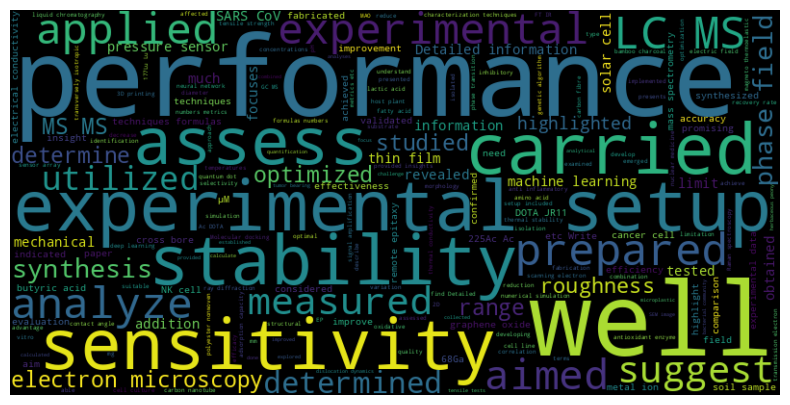

In [8]:
# Collect text and generate word cloud
text = collect_text(data)  # Ensure you have defined the function or method to collect text
svg_output = generate_word_cloud(text)


# Make a method that can query the answer data and return how many questions were correct for a filter.

In [17]:
def check_correct_answers(first_data, second_data):
    correct_answers = 0
    for question_info in second_data:
        for question_id, question_data in question_info.items():
            if isinstance(question_data, dict) and 'Question' in question_data:
                correct_answer = question_data['Answer']
                question_prompt = question_data['Question']
                matching_entry = next((item for item in first_data if question_prompt in item['prompt']), None)
                if matching_entry and matching_entry['generated_answer'] == correct_answer:
                    correct_answers += 1

    return correct_answers

# Example usage

# ./GPT35_Answers/gpt3_5_evaluation_results.json
print("GPT-4")
print("-" * 10)
print("Filtered")
print("-" * 10)

correct_count_filtered = check_correct_answers(load_json("../results/GPT4_Answers/gpt4_evaluation_results.json"), filtered)
print(f'Number of correctly answered questions (filtered): {correct_count_filtered}')
print(f'Number of wrongly answered questions (filtered): {len(filtered) - correct_count_filtered}')
print(f'Accuracy (total): {correct_count_filtered / len(filtered):.2%}')

print("-" * 10)
print("Full Data")
print("-" * 10)

correct_count_total = check_correct_answers(load_json("../results/GPT4_Answers/gpt4_evaluation_results.json"), data)
print(f'Number of correctly answered questions (total): {correct_count_total}')
print(f'Number of wrongly answered questions (total): {len(data) - correct_count_total}')
print(f'Accuracy (total): {correct_count_total / len(data):.2%}')

print("=" * 50)
print("GPT-3.5")
print("-" * 10)
print("Filtered")
print("-" * 10)

correct_count_filtered = check_correct_answers(load_json("../results/GPT35_Answers/gpt3_5_evaluation_results.json"), filtered)
print(f'Number of correctly answered questions (filtered): {correct_count_filtered}')
print(f'Number of wrongly answered questions (filtered): {len(filtered) - correct_count_filtered}')
print(f'Accuracy (total): {correct_count_filtered / len(filtered):.2%}')

print("-" * 10)
print("Full Data")
print("-" * 10)

correct_count_total = check_correct_answers(load_json("../results/GPT35_Answers/gpt3_5_evaluation_results.json"), data)
print(f'Number of correctly answered questions (total): {correct_count_total}')
print(f'Number of wrongly answered questions (total): {len(data) - correct_count_total}')
print(f'Accuracy (total): {correct_count_total / len(data):.2%}')


GPT-4
----------
Filtered
----------
Number of correctly answered questions (filtered): 310
Number of wrongly answered questions (filtered): 40
Accuracy (total): 88.57%
----------
Full Data
----------
Number of correctly answered questions (total): 4000
Number of wrongly answered questions (total): 590
Accuracy (total): 87.15%
GPT-3.5
----------
Filtered
----------
Number of correctly answered questions (filtered): 288
Number of wrongly answered questions (filtered): 62
Accuracy (total): 82.29%
----------
Full Data
----------
Number of correctly answered questions (total): 3733
Number of wrongly answered questions (total): 857
Accuracy (total): 81.33%
